# Github: 
 
https://github.com/Alessandro5C/CA_TP_201913933_U201912400_U201913424

# __Quoridor__

#### Integrantes:
* Carhuancho Bazán Alessandro 
>U201913933
* Ingaroca Torres Andreluis
>U201913424
* Cruz Mamani Jack
>U201912400

# __Introducción__

Nuestro equipo de trabajo está en busca de una solución para el desarrollo del juego de Quoridor, basado en un enfoque de optimización de recursos, tanto en tiempo como espacio de memoria.

Este trabajo es fundamental para aplicar lo desarrollado en el curso de complejidad algorítmica. Como también, es base fundamental para una solución basada en Inteligencia Artificial.

Nuestra inspiración basa en analizar la complejidad y coste computacional de algoritmos para un eficiente desarrollo de software, proyectandonos en una visión a nuevas tecnologias, en lugar de una simple rutina de proceso.

## __Objetivos__

### __Del estudiante:__
   
*   __En Ingeniería de Software, el logro contribuye a alcanzar el: ABET – EAC - Student Outcome 4:__ La capacidad de reconocer responsabilidades éticas y profesionales en situaciones de ingeniería y hacer juicios informados, que deben considerar el impacto de las soluciones de ingeniería en contextos globales, económicos, ambientales y sociales.

*   __En Ciencias de la Computación, el logro contribuye a alcanzar el: ABET – CAC - Student Outcome 4:__ Reconocer las responsabilidades profesionales y tomar decisiones informadas sobre prácticas de computación basadas en principios legales y éticos.

### __Del trabajo:__
El presente trabajo tiene como objetivos:

*   Demostrar los conocimientos adquiridos dentro del curso y complementarlos a través de la investigación.

*   Analizar la complejidad de diferentes algoritmos y evaluar el consumo en espacio y en tiempo de dichos algoritmos.

*   Fortalecer las habilidades blandas, mejorando la comunicación y capacidad de trabajo en equipo de cada integrante del grupo.

## __Descripción del problema__

El Quoridor es un juego abstracto de estrategia donde pueden participar dos a cuatro personas, que sera desarrollado basado en los conocimientos adquiridos durante el ciclo en el curso mencionado en el lenguaje de programación de Python. En el presente trabajo se escalará el tamaño del tablero para que se pueda evaluar el coste computacional siguiendo las mismas reglas del juego original.

# __Estado del arte__

Los algoritmos que se usarán en el presente proyecto:
* Breadth First Search: Encuentra un árbol de expansión. Comienza de un vertice dado y explora todos los vertices vecinos antes de pasar a los siguientes vertice.
* Depth First Search: Encuentra un árbol de expansión en base a un vertice dado. Explora de forma recursiva cada nodo hasta llegar a un vertices que ya ha visitado o una hoja.
* A-star (A*): Dentro de un grafo, encuentra el camino más corto entre dos vertices indicados. Mediante la conservación de un árbol de caminos posibles, se va expandiendo una arista desde el nodo inicial de forma iterativa hasta cumplir con la condición de termino.

# __Metodología__

Para representar la conexión entre los diferentes vertices, usaremos listas de adyacencia. Una lista de adyacencia ocupa mucho espacio en memoria en este caso debido a que

>$\Complejidad\Espacial$

>Lista de adyacencia ->
$O(V+E) = O(max(V, E))$

>Matriz de adyacencia ->
$O(V^2)$

>Para un tablero $N*N$, existen $V=N^2$ y $E=2N(N-1)$
>>Reemplazando
>>> $O(N^2+2N(N-1))<O((N^2)^2)$

>>> $O(N^2)<O(N^4)$

Para representar el tablero, usaremos nodos que representen los espacios donde el jugador puede estar, además,de aristas que representaran si dicho movimiento es válido.

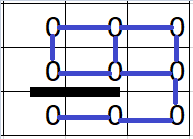

Otra forma de representar seria a través de una matriz que represente mediante simbolos, las barreras y los espacios donde el jugador puede colocarse.

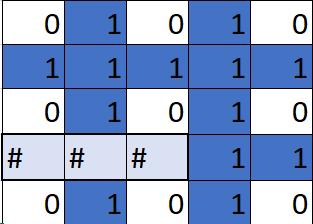

Sin embargo, para representar un tablero de $N*N$ se necesitaría una matriz real de $(2N-1)*(2N-1)$.

### Nuevas enfoques e ideas

*   Se añadió el algoritmo A-Star entre los algoritmos de búsqueda.

*   La implementación del algoritmo DFS se ha modificado para que sea totalmente recursiva.

*   Los algoritmos de búsqueda han sido modificados para encontrar el camino de un nodo inicial hacia cualquier parte de una fila o columna de forma eficiente.

    *   BFS y DFS: Cuando un nodo es visitado, se verifica si el nodo es parte de la fila o columna destino, en caso lo sea se asignara el padre del vertice y terminará su ejecución.

    *   A-Star: La heuristica se halla considerando $Heurística=M+D$, donde: $M=$ Cantidad de movimientos realizados desde el punto inicial y $D=$ Distancia perpedicular a la columna o fila destino.

    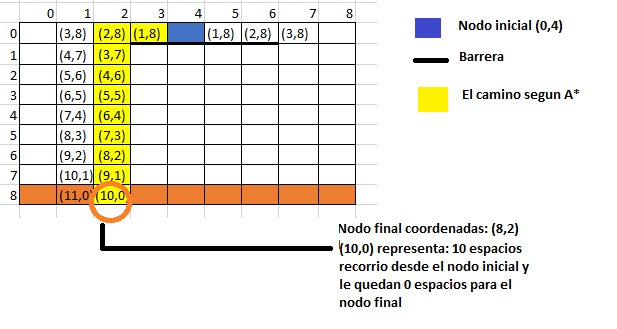

*   Para la implementación del juego, estamos considerando que todos los jugadores poseen la misma capacidad o conocen la estrategia del otro. De modo que, cada jugador sabe cual es el camino que usarán los otros.

    *   Cada jugador realiza un análisis para determinar el camino que tomará él mismo y realiza el mismo análisis para cada uno de sus contrincantes.
    *   Para evitar el duplicado de datos y/o procesos, se ejecutará el algoritmo correspondiente una sola vez por cada jugador. De forma que cada jugador tendrá acceso a una piscina de datos con los caminos de cada uno.  
    
    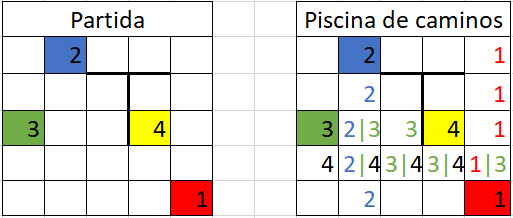

### Intenciones

*   Mejorar el aspecto gráfico, tamaño y relación de aspecto de los jugadores con el tablero.

*   Encapsular los métodos y atributos de los jugadores y del juego usando POO.

*   Implementación de un algoritmo de decisión para decidir si realizar un movimiento o colocar una barrera.

    *   Se decidirá que jugada realizar en base a la proximidad que tiene el jugador para ganar, es decir, si la cantidad de movimientos del jugador es menor que la de sus contrincantes, avanzará. En caso contrario, le colocará una barrera al jugador que tenga las de ganar. 

*   Implementación de un algoritmo de decisión para colocar una barrera eficientemente.

    *   Dado nuestro enfoque de implementación del juego, los demás jugadores conocen en todo momento quien está más proximo a ganar y la ruta que tomará para lograrlo. Dado el caso, se podra colocar una barrera de modo que, invalidaría el camino que se pensaba tomar, teniendo que recalcular nuevamente un camino para llegar a la fila o columna destino.
    *   La intención es que el jugador más próximo a ganar retroceda sobre sus pasos.


   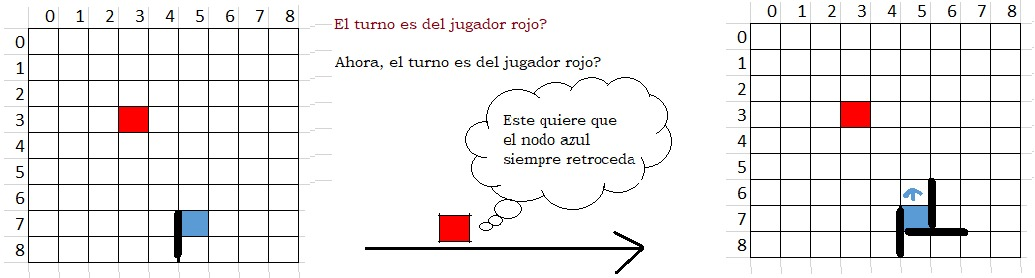

## Librerias necesarias

In [2]:
import math
import time
import random
import heapq as hp
import networkx as nx
from collections import deque
import matplotlib.pyplot as plt
import sys
sys.setrecursionlimit(10**9)

### Creación de la estructura del tablero con ayuda de Networkx

In [3]:
#Crear tablero
def CrearTableroR(n:int):
  G = nx.Graph()
  #Vertical
  for i in range(n-1):
    for j in range(n):
      G.add_edge((i, j), (i + 1, j))
      G.nodes[(i, j)]['id'] = (i, j) 
      G.nodes[(i + 1, j)]['id'] = (i + 1, j)
  #Horizontal
  for i in range(n):
    for j in range(n-1):
      G.add_edge((i, j), (i, j + 1))
      G.nodes[(i, j)]['id'] = (i, j) 
      G.nodes[(i, j + 1)]['id'] = (i, j + 1) 
  return G

In [4]:
#Clase Jugador
class Jugador():
   def __init__(self, pos_actual, foc, destino, color):
       self.pos_actual = pos_actual
       self.foc = foc
       self.destino = destino
       self.color = color
       self.path = []
       self.NBarrier = 0

### Funciones necesarias para la implementación de los algoritmos de búsqueda

In [5]:
#Print Path
def PrintPath(G, s, v, camino):
  if v['id'] == s['id']:
    camino.append(s['id'])
  else:
    PrintPath(G,s,v['padre'],camino)
    camino.append(v['id'])

In [6]:
#Examina un nodo y verifica que este sea parte del \
# conjunto de puntos donde el jugador se considera ganador
def lineaGanadora(v, n):    
    fila, col = v['id']
    if (J[n].foc == 'f'):
        if (fila == J[n].destino):
            return True
    else:
        if (col == J[n].destino):
            return True
    return False

## Implementación de los algoritmos

In [7]:
#DFS
def DFSr(G, u, n, vertice, termino):
    if (termino):
        return
    u['vis'] = 1
    for _, v_id in G.edges(u['id']):
        v = G.nodes[v_id]
        if (v['vis'] == 0):
            v['padre'] = u
            if (lineaGanadora(v, n)):
                vertice.append(v)
                termino = True
                return
            DFSr(G, v, n, vertice, termino)
    

def DFS(G, s, n):
    for _, u in G.nodes(data=True):
        u['padre'] = None
        u['vis'] = 0
    vertice, termino = [], False
    camino = deque()
    DFSr(G, s, n, vertice, termino)
    if (len(vertice) == 0):
        return camino
    PrintPath(G, s, vertice[0], camino)
    return camino

In [8]:
#BFS
def BFS(G, s, n):
  for _, u in G.nodes(data=True):
    u['d'] = 10**10
    u['padre'] = None
    u['vis'] = 0
  Q = deque()
  s['d'] = 0
  s['padre'] = None
  s['vis'] = 1
  Q.append(s)
  while (len(Q) != 0):
    u = Q.popleft()
    for _, v_id in G.edges(u['id']):
      v = G.nodes[v_id]
      if v['vis'] == 0:
        v['d'] = u['d'] + 1
        v['padre'] = u
        v['vis'] = 1
        if (lineaGanadora(v, n)):
            camino = deque()
            PrintPath(G, s, v, camino)
            return camino
        Q.append(v)
  camino = deque()
  return camino

In [9]:
#A-Star
def heuristica(u, n):
    if J[n].foc == 'c':
        return u['paso'] + \
            abs(u['id'][1]-J[n].destino)
    else:
        return u['paso'] + \
            abs(u['id'][0]-J[n].destino)

def addOpen(u, open_ls):
    hp.heappush(open_ls, (u['f'], u['id']))
    u['isinopen'] = True

def aStar(G, s, n):
    open_ls = [] #contiene una tupla, formada por (f, nodo)
    for _, u in G.nodes(data=True):
        u['paso'] = math.inf
        u['padre'] = None
        u['f'] = math.inf
        u['isinopen'] = False
    s['paso'] = 0
    s['f'] = heuristica(s, n)
    addOpen(s, open_ls)
    #
    closed_ls = [] #solo contiene nodos
    
    while (len(open_ls) != 0):
        _, u = hp.heappop(open_ls)
        u = G.nodes[u]
        closed_ls.append(u)

        if (lineaGanadora(u, n)):
            camino = deque()
            PrintPath(G, s, u, camino)
            return camino

        for _, v_id in G.edges(u['id']):
            v = G.nodes[v_id]
            if v in closed_ls:
                continue

            if (u['paso'] + 1 < v['paso']) or \
                not (v['isinopen']):
                v['padre'] = u
                v['paso'] = u['paso'] + 1
                v['f'] = heuristica(v, n)
                addOpen(v, open_ls)
    camino = deque()
    return camino

## Función para dibujar la estructura del tablero 
#### Nota: (La imagen está rotada)

In [10]:
def dibujarGrafo(G):
  plt.figure(1, figsize=(12, 12))
  posiciones = dict([((x,y), (x,y)) for x, y in nx.get_node_attributes(G, 'id').values()])
  
  distancias = dict([((u,v), None) for u, v, atrib in G.edges(data=True)])
  nx.draw(G, pos=posiciones, with_labels=True,  node_color='skyblue', font_size = 12)
  nx.draw_networkx_edges(G, pos=posiciones)
  plt.show()

## Mecánicas del juego

In [11]:
#MOVIENTO EN DIAGONAL
#Verifica que el jugador no se encuentre en la misma posición que otro jugador
#En caso que dos jugadores ocupen una misma casilla, se procederá a realizar un segundo movimiento
def saltoPos(n, GUI):
    x, y = J[n].path[0] #Posición actual del jugador que se ha movido
    for e in [1, 2, 3, 4]:
        if e != n:
            x_aux, y_aux = J[e].path[0] #Posición actual de los otros jugadores
            if (x == x_aux and y == y_aux):
                #print('El jugador', n, 'mueve dos veces seguidas.')
                J[n].path.popleft()
                x, y = J[n].path[0]
    if (GUI):   print_pos_player(x, y, n)

#MOVIMIENTO
#Avanzamos una posicicón del camino obtenido por el algoritmo de búsqueda 
def sigPos(n, GUI):
    if len(J[n].path) > 1:
        x, y = J[n].path[0]
        if (GUI):   print_gray(x, y)
        J[n].path.popleft()
        saltoPos(n, GUI)
    if len(J[n].path) == 1:
        if (GUI):
            Tk().wm_withdraw()
            messagebox.showinfo(message="Jugador " + str(n), title="Ganador")
        return True
    return False

#VALIDACIONES
#Verifica la existencia de una arista
def valido(pos1, pos2):
    for _, v_id in G.edges(pos1):
        if v_id == pos2:
            return True
    return False

#VALIDACIONES
#Verifica si es válido colocar una barrera en la posción pensada
def viable(i, imaginario, esquinado, posI1, posI2, algoritmo):
    aux_path = [None]*5
    if (valido(imaginario, esquinado)) and \
        ((valido(posI2, esquinado)) or (valido(posI1, imaginario))):
        G.remove_edge(imaginario, esquinado)
        G.remove_edge(posI1, posI2)
        for e in [1, 2, 3, 4]:
            J[e].pos_actual = G.nodes[J[e].path[0]] 
            aux_path[e] = algoritmo(G, J[e].pos_actual, e)
            if len(aux_path) == 0:
                G.add_edge(imaginario, esquinado)
                G.add_edge(posI1, posI2)
                return False 
        for e in [1, 2, 3, 4]:
            J[e].path = aux_path[e]
        return True
    return False

#VALIDACIONES
#Verifica si la posición evaluada está detrás del jugador que va a bloquear
def isBehind(n, nodo):
    #si los dos son del mismo signo, no esta atras
    if J[n].foc == 'f':
        if (-1)**(J[n].destino - J[n].pos_actual['id'][0])==\
            (-1)**(nodo[0] - J[n].pos_actual['id'][0]): 
            return False
        return True
    else:
        if (-1)**(J[n].destino - J[n].pos_actual['id'][1])==\
            (-1)**(nodo[1] - J[n].pos_actual['id'][1]):
            return False
        return True

#COLOCAR BARRERA
#Evalua donde es posible colocar una barrera y de que forma colocarla para:
#   No afectar nuestro camino actual
#   Incrementar la cantidad de pasos a realizar del jugador a bloquear
#Si no es posible cumplir las dos condiciones, se realizará un movimiento
def Block(n, i, algoritmo, GUI): #n <- Jugador que blockear
    #print('El jugador', n, 'coloca barrera a ', i)
    r = random.randint(0, 1)
    if J[n].foc == J[i].foc:
        if J[i].foc == 'f':     
            for e in range(len(J[i].path) - 1, 0, -1):
                if isBehind(n, J[i].path[e]):
                    imaginario = (J[i].path[e][0], J[i].path[e][1] + (-1)**(r))
                    esquinado = (J[i].path[e+1][0], J[i].path[e+1][1] + (-1)**(r))
                    posI1, posI2 = J[i].path[e], J[i].path[e+1]
                    if viable(i, imaginario, esquinado, posI1, posI2, algoritmo):
                        if (GUI):
                            print_barrierH(imaginario, esquinado, n)
                            print_barrierH(posI1, posI2, n)
                        J[n].NBarrier -= 1 
                        break
                    continue
                return sigPos(n, GUI)
        else:
            for e in range(len(J[i].path) - 1, 0, -1):
                if isBehind(n, J[i].path[e]):
                    imaginario = (J[i].path[e][0] + (-1)**(r), J[i].path[e][1])
                    esquinado = (J[i].path[e+1][0] + (-1)**(r), J[i].path[e+1][1])
                    posI1, posI2 = J[i].path[e], J[i].path[e+1]
                    if viable(i, imaginario, esquinado, posI1, posI2, algoritmo):
                        if (GUI):
                            print_barrierV(imaginario, esquinado, n)
                            print_barrierV(posI1, posI2, n)
                        J[n].NBarrier -= 1
                        break
                    continue
                return sigPos(n, GUI)
    else:
        if J[i].foc == 'f':
            for e in range(len(J[i].path) - 1):
                if (1 == abs(J[i].path[e][0]-J[i].path[e+1][0])):
                    imaginario = (J[i].path[e][0], J[i].path[e][1] + (-1)**(r))
                    esquinado = (J[i].path[e+1][0], J[i].path[e+1][1] + (-1)**(r))
                    posI1, posI2 = J[i].path[e], J[i].path[e+1]
                    if viable(i, imaginario, esquinado, posI1, posI2, algoritmo):
                        if (GUI):
                            print_barrierH(imaginario, esquinado, n)
                            print_barrierH(posI1, posI2, n)
                        J[n].NBarrier -= 1
                        break
        else:
            for e in range(len(J[i].path) - 1): 
                if (1 == abs(J[i].path[e][1]-J[i].path[e+1][1])): 
                    imaginario = (J[i].path[e][0] + (-1)**(r), J[i].path[e][1])
                    esquinado = (J[i].path[e+1][0] + (-1)**(r), J[i].path[e+1][1])
                    posI1, posI2 = J[i].path[e], J[i].path[e+1]
                    if viable(i, imaginario, esquinado, posI1, posI2, algoritmo):
                        if (GUI):
                            print_barrierV(imaginario, esquinado, n)
                            print_barrierV(posI1, posI2, n)
                        J[n].NBarrier -= 1
                        break
        return False

#MOVER O COLOCAR BARRERA
#Decide cuál es mejor en base a la ventaja que tengamos frente a los otros jugadores
#Si otro jugador es aquel que posee más 
def MoveOrBlock(n, algoritmo, GUI):
    mini = min([len(J[1].path), len(J[2].path),\
         len(J[3].path), len(J[4].path)])
    minimos = []
    for e in [1, 2, 3, 4]:
        if len(J[e].path)==mini:
            minimos.append(e)
    i = random.choice(minimos)
    if (n == i) or (abs(len(J[n].path)- len(J[i].path))==0) \
        or (J[n].NBarrier==0) or (1==(-1)**(random.randint(0, 1))):
        return sigPos(n, GUI)
    else:
        return Block(n, i, algoritmo, GUI)

## Funciones adicionales para ver la interfaz gráfica del juego
#### Nota: Es necesario un display gráfico y tener instalado pygame

In [12]:
import pygame
from tkinter import *
from tkinter import messagebox

GRIS_DARK = (100, 100, 100)
GRIS_LIGHT = (120, 120, 120)
NEGRO = (0, 0, 0)

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [13]:
def print_pos_player(i, j, n):
    pygame.draw.rect(pantalla, J[n].color, [j*D+(D//4), i*D+(D//4), D//2, D//2], 0)
    pygame.display.update(pygame.Rect(j*D, i*D, D, D))

def print_gray(i, j):
    pygame.draw.rect(pantalla, GRIS_LIGHT, [j*D+(D//4), i*D+(D//4), D//2, D//2], 0)
    pygame.display.update(pygame.Rect(j*D, i*D, D, D))

def print_barrierH(nodo1, nodo2, n):
    i, j = 0, 0
    aux = min([nodo1[0], nodo2[0]])
    for e in [nodo1, nodo2]:
        if e[0] == aux:
            i, j = e[0], e[1]
    pygame.draw.rect(pantalla, J[n].color, [j*D, i*D+(7*D//8), D, D//4], 0)
    #pygame.draw.rect(pantalla, NEGRO, [j*D, i*D+(7*D//8), D, D//4], 0)
    pygame.display.update(pygame.Rect(j*D, i*D+(7*D//8), D, D//4))

def print_barrierV(nodo1, nodo2, n):
    i, j = 0, 0
    aux = min([nodo1[1], nodo2[1]])
    for e in [nodo1, nodo2]:
        if e[1] == aux:
            i, j = e[0], e[1]
    pygame.draw.rect(pantalla, J[n].color, [j*D+(7*D//8), i*D, D//4, D], 0)
    #pygame.draw.rect(pantalla, NEGRO, [j*D+(7*D//8), i*D, D//4, D], 0)
    pygame.display.update(pygame.Rect(j*D+(7*D//8), i*D, D//4, D))

# Quoridor (Juego)

### Código ejecutable sin interfaz gráfica

In [14]:
N, algoritmo = 9, aStar
print(f"Quoridor en un tablero {N}x{N}")

start = time.time()
G = CrearTableroR(N)
end = time.time()

print("Tiempo creación del tablero:", (end - start))
J = {
    1 : (Jugador((G.nodes[(N-1, N//2)]), 'f', 0, (255, 0, 0))),
    2 : (Jugador((G.nodes[(0, N//2)]), 'f', (N-1), (0, 0, 255))),
    3 : (Jugador((G.nodes[(N//2, N-1)]), 'c', 0, (0, 255, 0))),
    4 : (Jugador((G.nodes[(N//2, 0)]), 'c', (N-1), (0, 255, 255)))
}

start = time.time()
juego_terminado = False
#Los caminos que tomen los jugadores se definen aqui
for e in [1, 2, 3, 4]:
    J[e].path = algoritmo(G, J[e].pos_actual, e)
    J[e].NBarrier = (N+1)//2 #La cantidad de barreras se asigna aquí
#Bucle del juego
Turno = 1 #Comienza el jugador 1
while juego_terminado == False:
    if Turno == 5:
        Turno = 1
    juego_terminado = MoveOrBlock(Turno, algoritmo, False)
    Turno += 1
end = time.time()

print("Ganador:", (Turno-1))
print("Duración del juego:", (end - start))

Quoridor en un tablero 9x9
Tiempo creación del tablero: 0.0010001659393310547
Ganador: 1
Duración del juego: 0.007997751235961914


### Código ejecutable con interfaz gráfica

In [15]:
N, algoritmo = 9, aStar
print(f"Quoridor en un tablero {N}x{N}")
#
start = time.time()
G = CrearTableroR(N)
end = time.time()

print("Tiempo creación del tablero:", (end - start))
J = {
    1 : (Jugador((G.nodes[(N-1, N//2)]), 'f', 0, (255, 0, 0))),
    2 : (Jugador((G.nodes[(0, N//2)]), 'f', (N-1), (0, 0, 255))),
    3 : (Jugador((G.nodes[(N//2, N-1)]), 'c', 0, (0, 255, 0))),
    4 : (Jugador((G.nodes[(N//2, 0)]), 'c', (N-1), (0, 255, 255)))
}
#
#Establecer las dimensiones de la pantalla
pygame.init()
T = 990
D = int(T // N)
T = (N)*D-(D//8)
pantalla = pygame.display.set_mode([T, T])
pygame.display.set_caption("Quoridor")
reloj = pygame.time.Clock()
#
#Dibujar el tablero en la pantalla 
pantalla.fill(GRIS_LIGHT)
for i in range(1, N):
    pygame.draw.rect(pantalla, GRIS_DARK, [0, i*D-(D//8), T, (D//8)], 0)
for j in range(1, N):
    pygame.draw.rect(pantalla, GRIS_DARK, [j*D-(D//8), 0, (D//8), T], 0)
#
start = time.time()
juego_terminado = False
#Los caminos que tomen los jugadores se definen aqui
for e in [1, 2, 3, 4]:
    J[e].path = algoritmo(G, J[e].pos_actual, e)
    J[e].NBarrier = (N+1)//2 #La cantidad de barreras se asigna aquí
#Dibujamos las posiciones inciales de los jugadores
for e in [1, 2, 3, 4]:
    print_pos_player(J[e].path[0][0], J[e].path[0][1], e)
#Bucle del juego
Turno = 1 #Comienza el jugador 1
pygame.display.flip()
while juego_terminado == False:
    reloj.tick(15) #Comentar o descomentar no importa
    if Turno == 5:
        Turno = 1
    juego_terminado = MoveOrBlock(Turno, algoritmo, True)
    Turno += 1
end = time.time()
pygame.quit()
#
print("Ganador:", (Turno-1))
print("Duración del juego:", (end - start))

Quoridor en un tablero 9x9
Tiempo creación del tablero: 0.0009989738464355469
Ganador: 3
Duración del juego: 6.773361921310425


## Ver la estructura del grafo

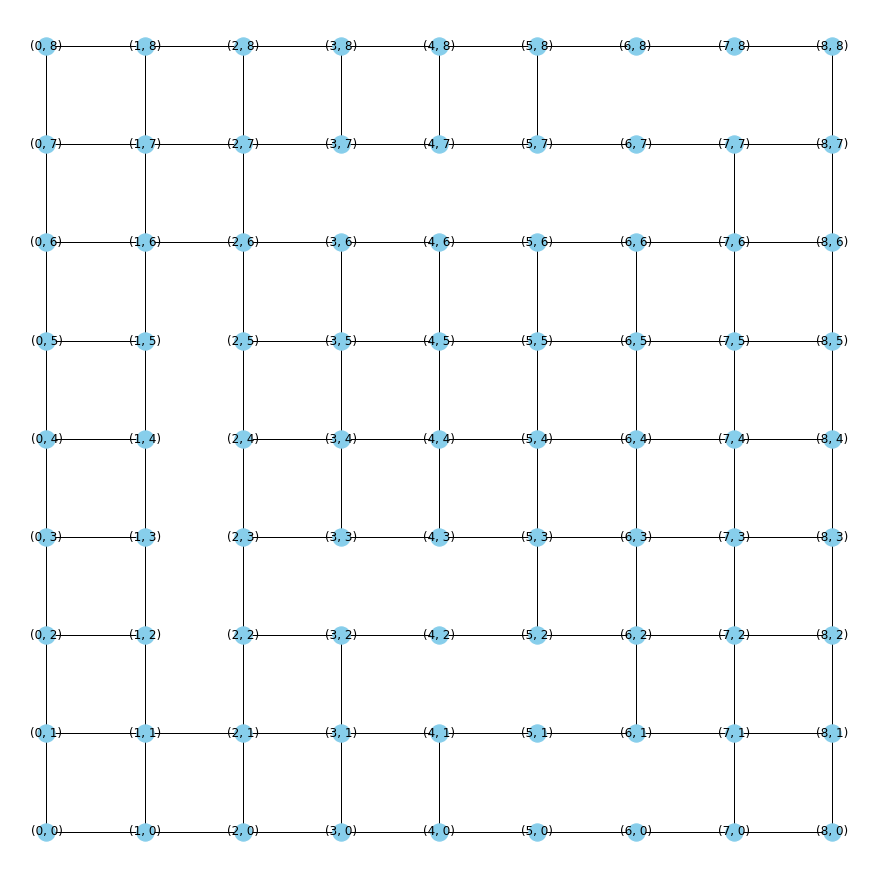

In [16]:
dibujarGrafo(G)

## Experimentos y métricas

In [17]:
#Inicializacion de las variables globales
############################################################

N, algoritmo = 9, aStar

startTablero = time.time()
G = CrearTableroR(N)
endTablero = time.time()
J = {
    1 : (Jugador((G.nodes[(N-1, N//2)]), 'f', 0, (255, 0, 0))),
    2 : (Jugador((G.nodes[(0, N//2)]), 'f', (N-1), (0, 0, 255))),
    3 : (Jugador((G.nodes[(N//2, N-1)]), 'c', 0, (0, 255, 0))),
    4 : (Jugador((G.nodes[(N//2, 0)]), 'c', (N-1), (0, 255, 255)))
}

startJuego = time.time()
juego_terminado = False
#Los caminos que tomen los jugadores se definen aqui
for e in [1, 2, 3, 4]:
    J[e].path = algoritmo(G, J[e].pos_actual, e)
    J[e].NBarrier = (N+1)//2 #La cantidad de barreras se asigna aquí
#Bucle del juego
Turno = 1 #Comienza el jugador 1
while juego_terminado == False:
    if Turno == 5:
        Turno = 1
    juego_terminado = MoveOrBlock(Turno, algoritmo, False)
    Turno += 1
endJuego = time.time()

################################################################

################################################################
for i in range(9, 50, 10):
    N, algoritmo = i, aStar

    startTablero = time.time()
    G = CrearTableroR(N)
    endTablero = time.time()

    print("Tiempo creación del tablero:", (end - start))
    #inserte en el txt Duración de creacio del tablero (end - start)
    J = {
        1 : (Jugador((G.nodes[(N-1, N//2)]), 'f', 0, (255, 0, 0))),
        2 : (Jugador((G.nodes[(0, N//2)]), 'f', (N-1), (0, 0, 255))),
        3 : (Jugador((G.nodes[(N//2, N-1)]), 'c', 0, (0, 255, 0))),
        4 : (Jugador((G.nodes[(N//2, 0)]), 'c', (N-1), (0, 255, 255)))
    }

    startJuego = time.time()
    juego_terminado = False
    #Los caminos que tomen los jugadores se definen aqui
    for e in [1, 2, 3, 4]:
        J[e].path = algoritmo(G, J[e].pos_actual, e)
        J[e].NBarrier = (N+1)//2 #La cantidad de barreras se asigna aquí
    #Bucle del juego
    Turno = 1 #Comienza el jugador 1
    while juego_terminado == False:
        if Turno == 5:
            Turno = 1
        juego_terminado = MoveOrBlock(Turno, algoritmo, False)
        Turno += 1
    endJuego = time.time()

    f=open("metricas_aStar.txt", "a")
    str_aux = f'{N}, {(endTablero-startTablero)}, {(endJuego-startJuego)}\n'
    f.write(str_aux)
    f.close()
    print(f"Iteracion con {N}x{N}:", (endJuego-startTablero))

Tiempo creación del tablero: 6.773361921310425
Iteracion con 9x9: 0.003998756408691406
Tiempo creación del tablero: 6.773361921310425
Iteracion con 19x19: 0.05198240280151367
Tiempo creación del tablero: 6.773361921310425
Iteracion con 29x29: 0.18693995475769043
Tiempo creación del tablero: 6.773361921310425
Iteracion con 39x39: 0.2289261817932129
Tiempo creación del tablero: 6.773361921310425
Iteracion con 49x49: 0.4738481044769287


### Debido a la falta de un display gráfico, se ha puesto una imagen en la carpeta evidencias de la interfaz gráfica.

##### Nota: La imagen fue sacada en una previa compilación desde Visual Studio Code. 

